La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'il faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`capa_num` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.


# Exemple d'implémentation

## Implémentation
On propose ici des exemples d'implétentation de la méthode dichotomie.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Implementation avec une boucle while
def dicho_while(f:callable, a0:float, b0:float, prec:float) -> float:
    # On vérifier quand même que a0 et b0 ne sont pas les racines
    if f(a0) == 0:
        return a0
    elif f(b0) == 0:
        return b0

    # Initialisation
    a = a0
    b = b0
    n = 0 # OPTIONNEL : Compte des iterations
    while np.abs(b - a) > prec:
        n = n + 1 # OPTIONNEL : Compte des iterations
        c = (a + b) / 2  # milieu
        if f(c) == 0:  # c est la racine
            a, b = c, c  # intervale reduit a [c,c]
        elif f(c) * f(b) < 0:
            a, b = c, b
        else:
            a, b = a, c
    c = (a + b) / 2
    print("Nombre d iterations : {}".format(n)) # OPTIONNEL : Compte des iterations
    return c

In [2]:
# Implementation recursive
def dicho_recursif(f:callable, a0:float, b0:float, prec:float) -> float:
    # On vérifier quand même que a0 et b0 ne sont pas les racines
    if f(a0) == 0:
        return a0
    elif f(b0) == 0:
        return b0
    elif (b0 -a0) < prec:
        return (a0 + b0) / 2
    else:
        c = (a0 + b0) / 2
        if f(c) == 0:
            return c
        elif f(c) * f(b0) < 0:
            return dicho_recursif(f, c, b0, prec)
        else:
            return dicho_recursif(f, a0, c, prec)

## Utilisation

On reprend les fonctions:
* $f(x) = \exp(x) + x$
* $g(x) = \sin (x) - x / 2$ avec $x > 0$ à $10^{-12}$ près.
* $h(x) = \ln (x) + x$ à $10^{-12}$ près.

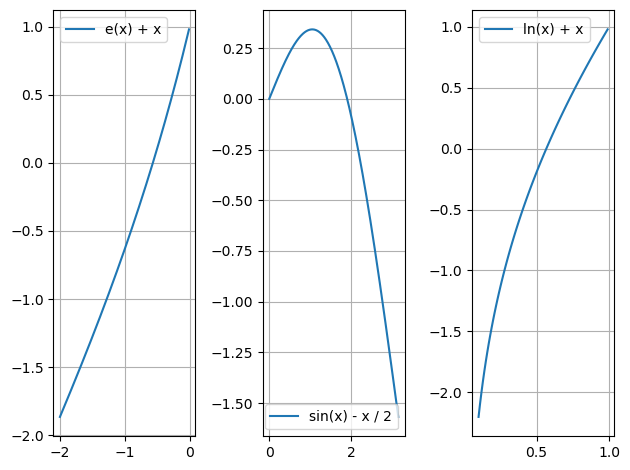

In [3]:
from scipy.optimize import bisect

def f(x):
    return np.exp(x) + x


def g(x):
    return np.sin(x) - x/2


def h(x):
    return np.log(x) + x


"""Etude graphique"""
xf = np.arange(-2, 0, 1e-2)
xg = np.arange(0, np.pi, 1e-2)
xh = np.arange(0.1, 1, 1e-2)
fig, ax = plt.subplots(1, 3)
ax[0].plot(xf, f(xf), label="e(x) + x")
ax[1].plot(xg, g(xg), label="sin(x) - x / 2")
ax[2].plot(xh, h(xh), label="ln(x) + x")

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].grid()
ax[1].grid()
ax[2].grid()

fig.tight_layout()
plt.show()

In [4]:
xf1 = dicho_while(f, -2, 0, 1e-12)
xf2 = dicho_recursif(f, -2, 0, 1e-12)
xf3 = bisect(f, -2, 0)

xg1 = dicho_while(g, 0.1, np.pi, 1e-12)
xg2 = dicho_recursif(g, 0.1, np.pi, 1e-12)
xg3 = bisect(g, 0.1, np.pi)

xh1 = dicho_while(h, 0.1, 1, 1e-12)
xh2 = dicho_recursif(h, 0.1, 1, 1e-12)
xh3 = bisect(h, 0.1, 1)

print("Racine de f : {}".format([xf1, xf2, xf3]))
print("Racine de g : {}".format([xg1, xg2, xg3]))
print("Racine de h : {}".format([xh1, xh2, xh3]))

Nombre d iterations : 41
Nombre d iterations : 42
Nombre d iterations : 40
Racine de f : [-0.5671432904096037, -0.5671432904096037, -0.5671432904109679]
Racine de g : [1.8954942670342385, 1.8954942670342385, 1.8954942670332011]
Racine de h : [0.5671432904096492, 0.5671432904096492, 0.5671432904100584]


_Note : on remarquera que les valeurs sont à peu près égales à $10^{-12}$ près mais pas rigoureusement car le test d'arrêt dans `bisect` est un peu plus complexe que la simple largeur de l'intervale.